## Imports

In [58]:
import pandas as pd
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Read the csv file data into a pandas DataFrame

In [2]:
# Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')

## Data Exploration

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## What's the balance of the classes?

Seems very unbalanced

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Observations

- Extremely imbalanced ( as we probably expected with fraud )

- If we don't penalize FN's appropriately, we might end up with a model that calls everything legit

- Even though fraud is relatively rare but when it happens it's important we catch it.


In [7]:
df.shape

(284807, 31)

## Add a column with a random value between 0 and 1, we will use this later to split the dataset into Train, Validation and Test sets

## Set a Seed to make the random numbers reproducible with subsequent runs

In [8]:
np.random.seed(42)

In [9]:
df['random'] = np.random.rand(len(df))

## Pandas masks = boolean conditions on a row
# Filtering returns a slice of a dataframe, so dangerous to mutate it

In [10]:
train_df = df[df['random'] <=0.8]
validation_df = df[(df['random'] > 0.8) & (df['random'] <=0.9 )]
test_df = df[df['random'] > 0.9]

In [11]:
data_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [12]:
X_train = train_df[data_columns]
Y_train = train_df['Class']

X_validation = validation_df[data_columns]
Y_validation = validation_df['Class']

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train,Y_train)

/Users/nikhilraju/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
Y_pred = lr.predict(X_validation)

In [16]:
pd.Series(Y_pred).value_counts()

0    28645
1       32
dtype: int64

In [17]:
cm = confusion_matrix(Y_validation, Y_pred)

In [18]:
tn, fp, fn, tp = cm.ravel()

## Precision

In [19]:
1.0 * cm.diagonal()/cm.sum(axis=0)

array([0.99933671, 0.71875   ])

## Recall

In [20]:
1.0*cm.diagonal() / cm.sum(axis=1)

array([0.9996857 , 0.54761905])

In [22]:
#plot_confusion_matrix(Y_validation, Y_pred, )

## Dealing with imbalance

http://www.cs.cmu.edu/~qyj/IR-Lab/ImbalancedSummary.html

- Up-sample? synthetically generate more copies of the rare class
- Down-sample? Select a subset of the abundant class ( careful to avoid overfitting to selected subset and introducing bias )

## Metrics to optimize?

- Accuracy is not super useful, since predicting ONLY abundant class for ALL examples will still get you a good accuracy

- Try optimizing AUC or F1-score
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

- precision = tp + tn / ( tp + tn + fp + fn)

- false positive rate = fp/( fp + tn)

- true positive rate / recall / sensitivity = tp/( tp + fn)

- specificity = tn / ( tn + fp )


##  Confidence Threshold Tuning & Plot the ROC and AUC

In [29]:
Y_pred_with_probas = lr.predict_proba(X_validation)

In [64]:
fpr, tpr, thresholds = roc_curve(Y_validation, Y_pred_with_probas[:,1], pos_label=None, sample_weight=None, drop_intermediate=True)
auc_res = auc(fpr, tpr)


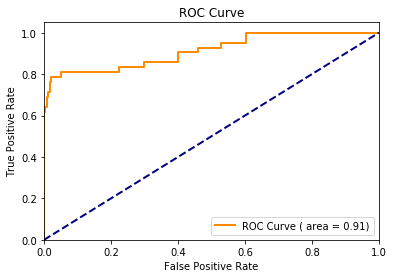

In [65]:
lw = 2
plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC Curve ( area = %0.2f)' %auc_res)
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])

plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC Curve')
plt.legend(loc="lower right")


In [81]:
fpr[fpr<0.4]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.49222979e-05,
       3.49222979e-05, 1.04766894e-04, 1.04766894e-04, 1.39689192e-04,
       1.39689192e-04, 3.14300681e-04, 3.14300681e-04, 6.63523660e-04,
       6.63523660e-04, 3.56207438e-03, 3.56207438e-03, 3.77160817e-03,
       3.84145277e-03, 7.50829405e-03, 7.50829405e-03, 9.91793260e-03,
       9.91793260e-03, 1.23624935e-02, 1.23624935e-02, 1.64134800e-02,
       1.64134800e-02, 1.64484023e-02, 1.64484023e-02, 2.03247774e-02,
       2.03247774e-02, 2.37122403e-02, 2.37820849e-02, 5.09516326e-02,
       5.09516326e-02, 1.05255806e-01, 1.05325650e-01, 1.35288982e-01,
       1.35358827e-01, 1.45660904e-01, 1.45730749e-01, 2.25004365e-01,
       2.25004365e-01, 2.90518596e-01, 2.90588441e-01, 2.98725336e-01,
       2.98725336e-01, 3.98603108e-01, 3.98603108e-01])

In [82]:
tpr[tpr>0.8]

array([0.80952381, 0.80952381, 0.80952381, 0.80952381, 0.80952381,
       0.80952381, 0.80952381, 0.80952381, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.85714286, 0.85714286, 0.88095238,
       0.88095238, 0.9047619 , 0.9047619 , 0.92857143, 0.92857143,
       0.92857143, 0.92857143, 0.95238095, 0.95238095, 0.95238095,
       0.95238095, 0.97619048, 0.97619048, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

## Select an operating threshold

In [83]:

for tp,fp,th in zip(tpr,fpr,thresholds):
    if tp > 0.8 and fp < 0.4:
        print('TPR: ',tp)
        print('FPR: ',fp)
        print('Threshold: ',th)
        print('-'*50)

TPR:  0.8095238095238095
FPR:  0.050951632617426225
Threshold:  0.010894591864736843
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.10525580583202375
Threshold:  0.004739747649981311
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.10532565042779815
Threshold:  0.004738981236911595
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.1352889820150166
Threshold:  0.003310908483129011
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.135358826610791
Threshold:  0.0033098434589527814
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.14566090448751529
Threshold:  0.0029410054202242807
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.14573074908328967
Threshold:  0.0029405578651704456
--------------------------------------------------
TPR:  0.8095238095238095
FPR:  0.2250043652872359
Thre

In [88]:
np.where(tpr == 0.8809523809523809)

(array([46, 47]),)

In [93]:
pd.Series(tpr).iloc[46]

0.8809523809523809

In [94]:
pd.Series(tpr).iloc[47]

0.8809523809523809

In [95]:
pd.Series(fpr).iloc[46]

0.39860310808451194

In [97]:
pd.Series(thresholds).iloc[46]

0.000180769133296786